In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# 读取数据
df = pd.read_csv('D:\\Python_work\\exercise_data\\train.csv')
 
# 处理缺失值 - 用中位数填充年龄缺失
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)
 
# 创建年龄分段
bins = [0, 18, 35, 50, 100]
labels = ['0-18', '18-35', '35-50', '50+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
 
# 1. 计算性别对生还率的影响
gender_survival = df.groupby('Sex')['Survived'].mean().reset_index()
gender_survival.columns = ['Sex', 'SurvivalRate']
 
# 2. 计算性别+年龄分段对生还率的影响
gender_age_survival = df.groupby(['Sex', 'AgeGroup'])['Survived'].mean().unstack()


C:\Users\和彦汝\AppData\Local\Temp\ipykernel_6040\3244181031.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_survival = df.groupby(['Sex', 'AgeGroup'])['Survived'].mean().unstack()



性别和年龄分段对生还率的影响:
| Sex    |     0-18 |    18-35 |    35-50 |      50+ |
|:-------|---------:|---------:|---------:|---------:|
| female | 0.676471 | 0.751445 | 0.732143 | 0.941176 |
| male   | 0.338028 | 0.162983 | 0.206186 | 0.12766  |


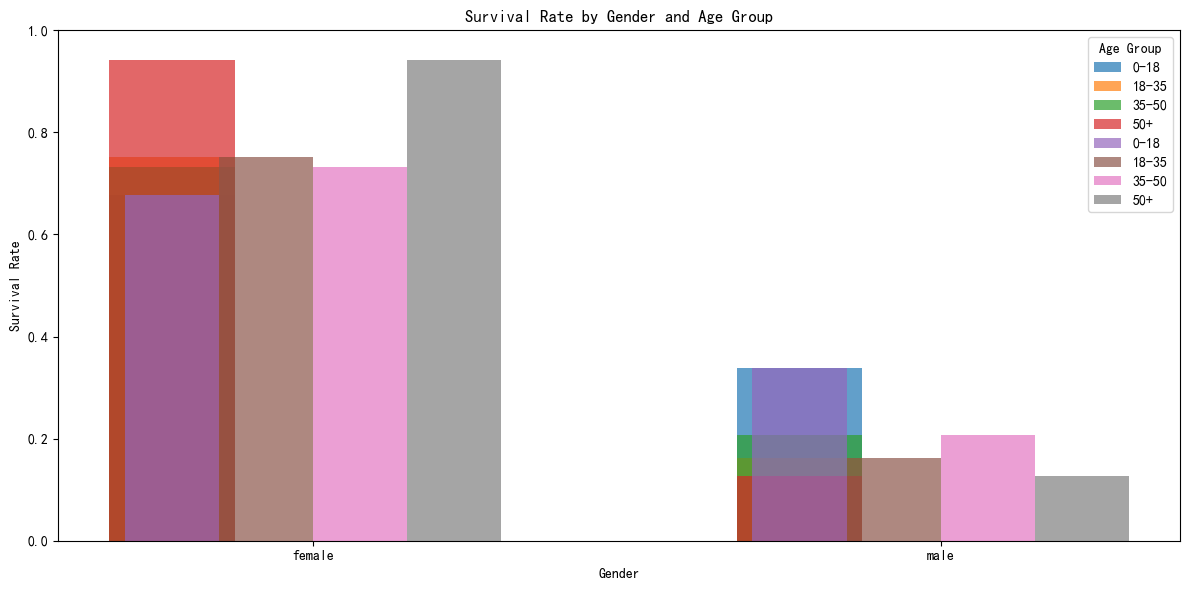

In [5]:
plt.rcParams['font.sans-serif'] = ['Simhei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 绘制图表
plt.figure(figsize=(12, 6))

# 只绘制有数据的组合
for age_group in gender_age_survival.columns:
    if not gender_age_survival[age_group].isna().all():
        plt.bar(gender_age_survival.index, gender_age_survival[age_group], 
                label=age_group, width=0.2, 
                alpha=0.7, bottom=np.zeros(len(gender_age_survival.index)))
 
# 调整柱状图位置避免重叠
x = np.arange(len(gender_age_survival.index))
width = 0.15
for i, age_group in enumerate(gender_age_survival.columns):
    if not gender_age_survival[age_group].isna().all():
        plt.bar(x + i*width, gender_age_survival[age_group], 
                width=width, label=age_group, alpha=0.7)
 
plt.title('Survival Rate by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(x + width*(len(gender_age_survival.columns)-1)/2, gender_age_survival.index)
plt.ylim(0, 1)
plt.legend(title='Age Group')
 
# 调整布局并保存
plt.tight_layout()
plt.savefig('survival_rate_analysis.png', dpi=300, bbox_inches='tight')
 
# 打印关键统计结果

print("\n性别和年龄分段对生还率的影响:")
print(gender_age_survival.to_markdown())